# Annotated Plots

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [209]:
df = pd.read_csv("data.csv")
df.head()

,tech_company,benefits,workplace_resources,mh_employer_discussion,mh_coworker_discussion,medical_coverage,mental_health,mh_share,age,gender,country
0,Yes,No,I don't know,No,Yes,Yes,Possibly,5,27.0,Female,United Kingdom
1,Yes,Yes,No,No,Yes,Yes,Possibly,4,31.0,Male,United Kingdom
2,Yes,I don't know,No,Yes,Yes,No,Yes,5,36.0,Male,United States of America
3,Yes,Yes,I don't know,Yes,Yes,Yes,Yes,10,22.0,Male,United States of America
4,Yes,Yes,No,No,Yes,Yes,Yes,8,36.0,Female,United States of America


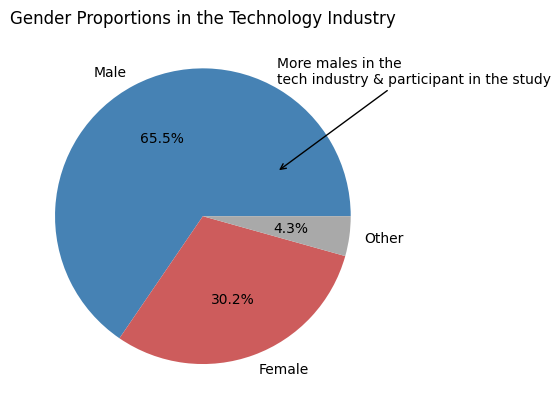

In [210]:
gender = df["gender"].value_counts()

colors = []
for g in gender.index:
    if g == "Male":
        colors.append("#4682B4")
    elif g == "Female":
        colors.append("#CD5C5C")
    else:
        colors.append("#A9A9A9")

plt.pie(gender, labels=gender.index, autopct="%1.1f%%", colors=colors)

plt.annotate("More males in the\ntech industry & participant in the study", xy=(0.5, 0.3), xytext=(0.5, 0.9), arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.title("Gender Proportions in the Technology Industry")
plt.show()

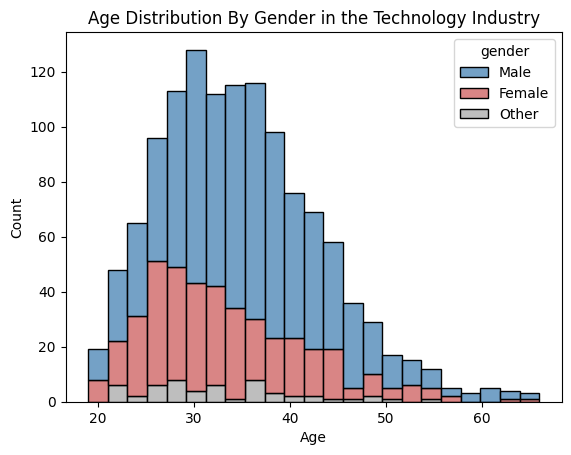

In [211]:
sns.histplot(df, x="age", hue="gender", multiple="stack", palette={"Male": "#4682B4", "Female": "#CD5C5C", "Other": "#A9A9A9"}, hue_order=["Male", "Female", "Other"])
plt.xlabel("Age")
plt.title("Age Distribution By Gender in the Technology Industry")
plt.show()

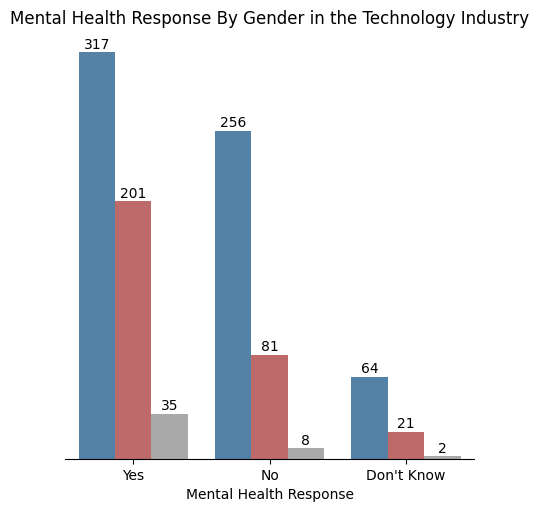

In [212]:
mh = df.groupby("mental_health")["gender"].value_counts().reset_index(name="Count")

mh_graph = sns.catplot(mh, x="mental_health", y="Count", hue="gender", kind="bar", palette={"Male": "#4682B4", "Female": "#CD5C5C", "Other": "#A9A9A9"}, order=["Yes", "No", "Don't Know"])

mh_graph.set_axis_labels("Mental Health Response", "")
for ax in mh_graph.axes.flat:
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])  

plt.title("Mental Health Response By Gender in the Technology Industry")
mh_graph._legend.remove()
for ax in mh_graph.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width()/2.,
                height + 0.5,
                int(height),
                ha='center',
                va='bottom'
            )

plt.show()

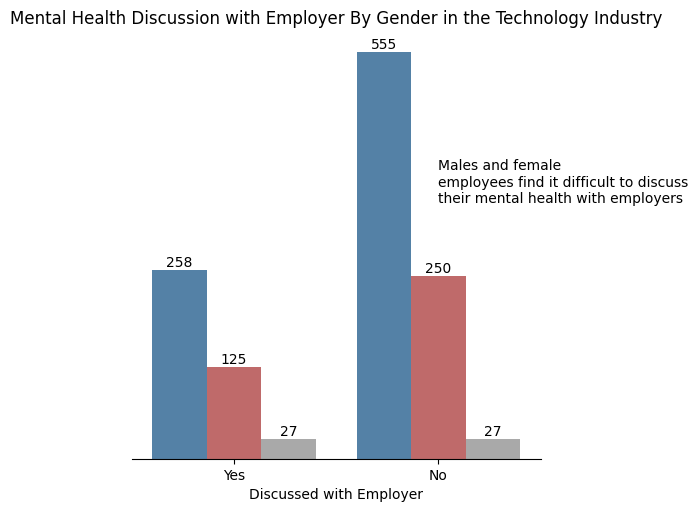

In [217]:
discussion = df.groupby("mh_employer_discussion")["gender"].value_counts().reset_index(name="Count")

discussion_graph = sns.catplot(discussion, x="mh_employer_discussion", y="Count", hue="gender", kind="bar", palette={"Male": "#4682B4", "Female": "#CD5C5C", "Other": "#A9A9A9"}, order=["Yes", "No"])

discussion_graph.set_axis_labels("Discussed with Employer", "")
for ax in discussion_graph.axes.flat:
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])  

plt.title("Mental Health Discussion with Employer By Gender in the Technology Industry")
discussion_graph._legend.remove()
for ax in discussion_graph.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width()/2.,
                height + 0.5,
                int(height),
                ha='center',
                va='bottom'
            )

plt.annotate("Males and female\nemployees find it difficult to discuss\ntheir mental health with employers", xy=(1.0, 250), xytext=(1.0, 350), fontsize=10)

plt.show()

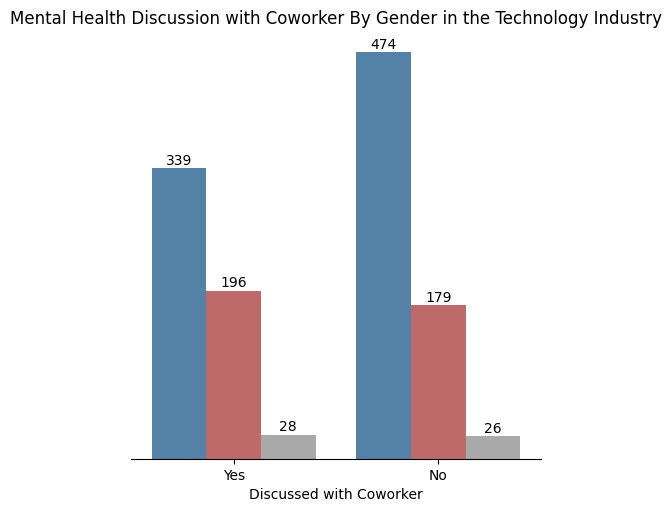

In [214]:
discussion2 = df.groupby("mh_coworker_discussion")["gender"].value_counts().reset_index(name="Count")

discussion2_graph = sns.catplot(discussion2, x="mh_coworker_discussion", y="Count", hue="gender", kind="bar", palette={"Male": "#4682B4", "Female": "#CD5C5C", "Other": "#A9A9A9"}, order=["Yes", "No"])

discussion2_graph.set_axis_labels("Discussed with Coworker", "")
for ax in discussion2_graph.axes.flat:
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])  

plt.title("Mental Health Discussion with Coworker By Gender in the Technology Industry")
discussion2_graph._legend.remove()
for ax in discussion2_graph.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width()/2.,
                height + 0.5,
                int(height),
                ha='center',
                va='bottom'
            )

plt.show()

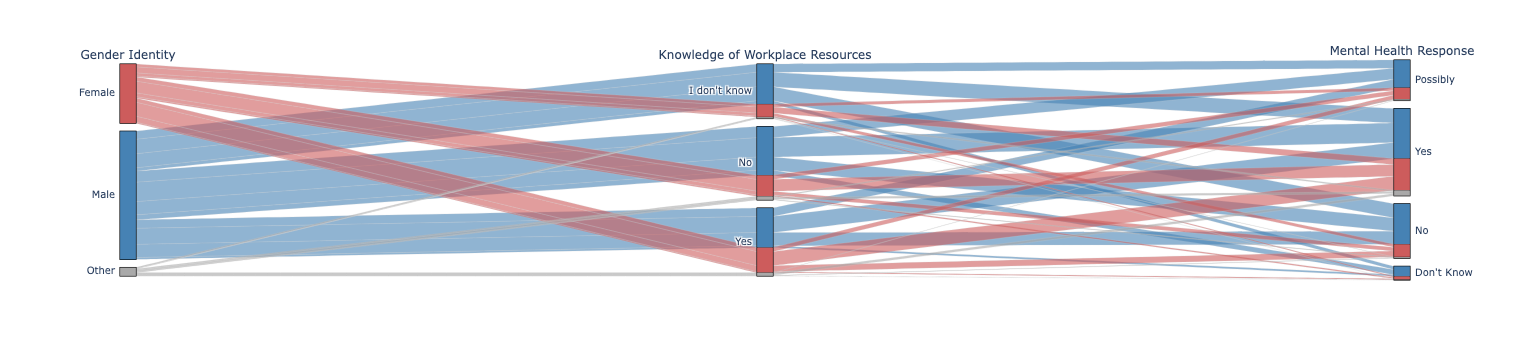

In [215]:
df["gender_color"] = df["gender"].map({"Male": 0, "Female": 1, "Other": 2})

plot = px.parallel_categories(df, dimensions=["gender", "workplace_resources", "mental_health"], 
                              labels={"gender": "Gender Identity", "workplace_resources": "Knowledge of Workplace Resources", "mental_health": "Mental Health Response"},
                              color="gender_color", color_continuous_scale=[[0.0, "#4682B4"], [0.5, "#CD5C5C"], [1.0, "#A9A9A9"]])
plot.update_coloraxes(showscale=False)